In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Exploratory data analysis

tootal No. of Living cases 203
tootal No. of Dead cases 96


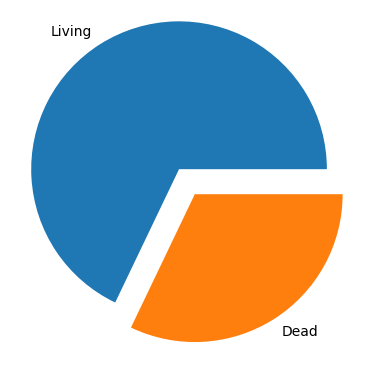

In [8]:
lives = len(df['DEATH_EVENT'][df.DEATH_EVENT == 0])
deaths = len(df['DEATH_EVENT'][df.DEATH_EVENT == 1])

arr=np.array([lives,deaths])
print("tootal No. of Living cases",lives)
print("tootal No. of Dead cases",deaths)

plt.pie(arr,labels=['Living','Dead'],explode=[0.2,0.0])
plt.show()

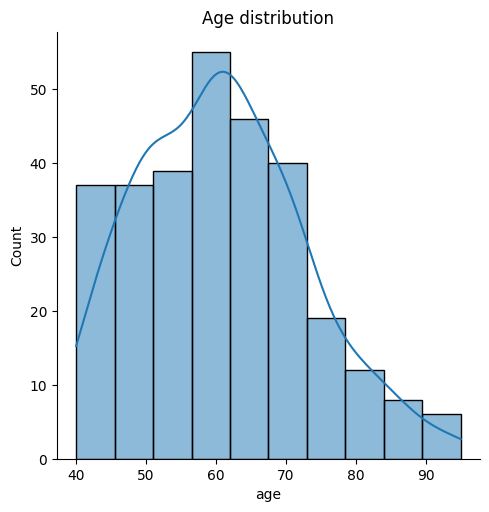

In [9]:
sns.displot(df['age'],kde=True)
plt.title('Age distribution')
plt.show()

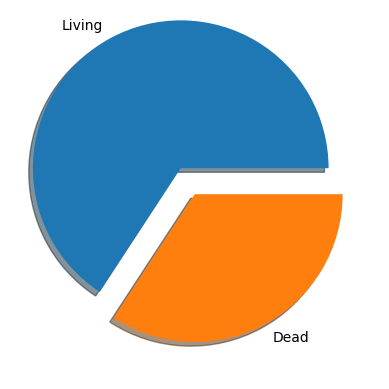

No. of people above 50 who are not dead 148
No. of people above 50 who are dead 77


In [10]:
above_50_not_dead = df['DEATH_EVENT'][df.DEATH_EVENT == 0][df.age > 50]
above_50_dead = df['DEATH_EVENT'][df.DEATH_EVENT == 1][df.age > 50]

len_died= len(above_50_dead)
len_not_died= len(above_50_not_dead)

arr1=np.array([len_not_died,len_died])
plt.pie(arr1,labels=['Living','Dead'],explode=[0.2,0.0],shadow=True)
plt.show()

print("No. of people above 50 who are not dead",len_not_died)
print("No. of people above 50 who are dead",len_died)


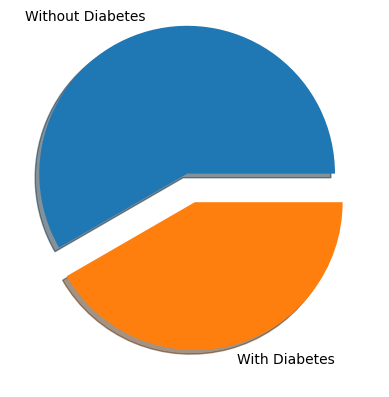

No. of people without diabetes who are dead 56
No. of people with diabetes who are dead 40


In [11]:
patinet_without_diabetes = df['DEATH_EVENT'][df.DEATH_EVENT == 1][df.diabetes == 0]
patinet_with_diabetes = df['DEATH_EVENT'][df.DEATH_EVENT == 1][df.diabetes == 1]

len_d_died= len(patinet_with_diabetes)
len_nd_died= len(patinet_without_diabetes)

arr2=np.array([len_nd_died,len_d_died])
plt.pie(arr2,labels=['Without Diabetes','With Diabetes'],explode=[0.2,0.0],shadow=True)
plt.show()

print("No. of people without diabetes who are dead",len_nd_died)
print("No. of people with diabetes who are dead",len_d_died)

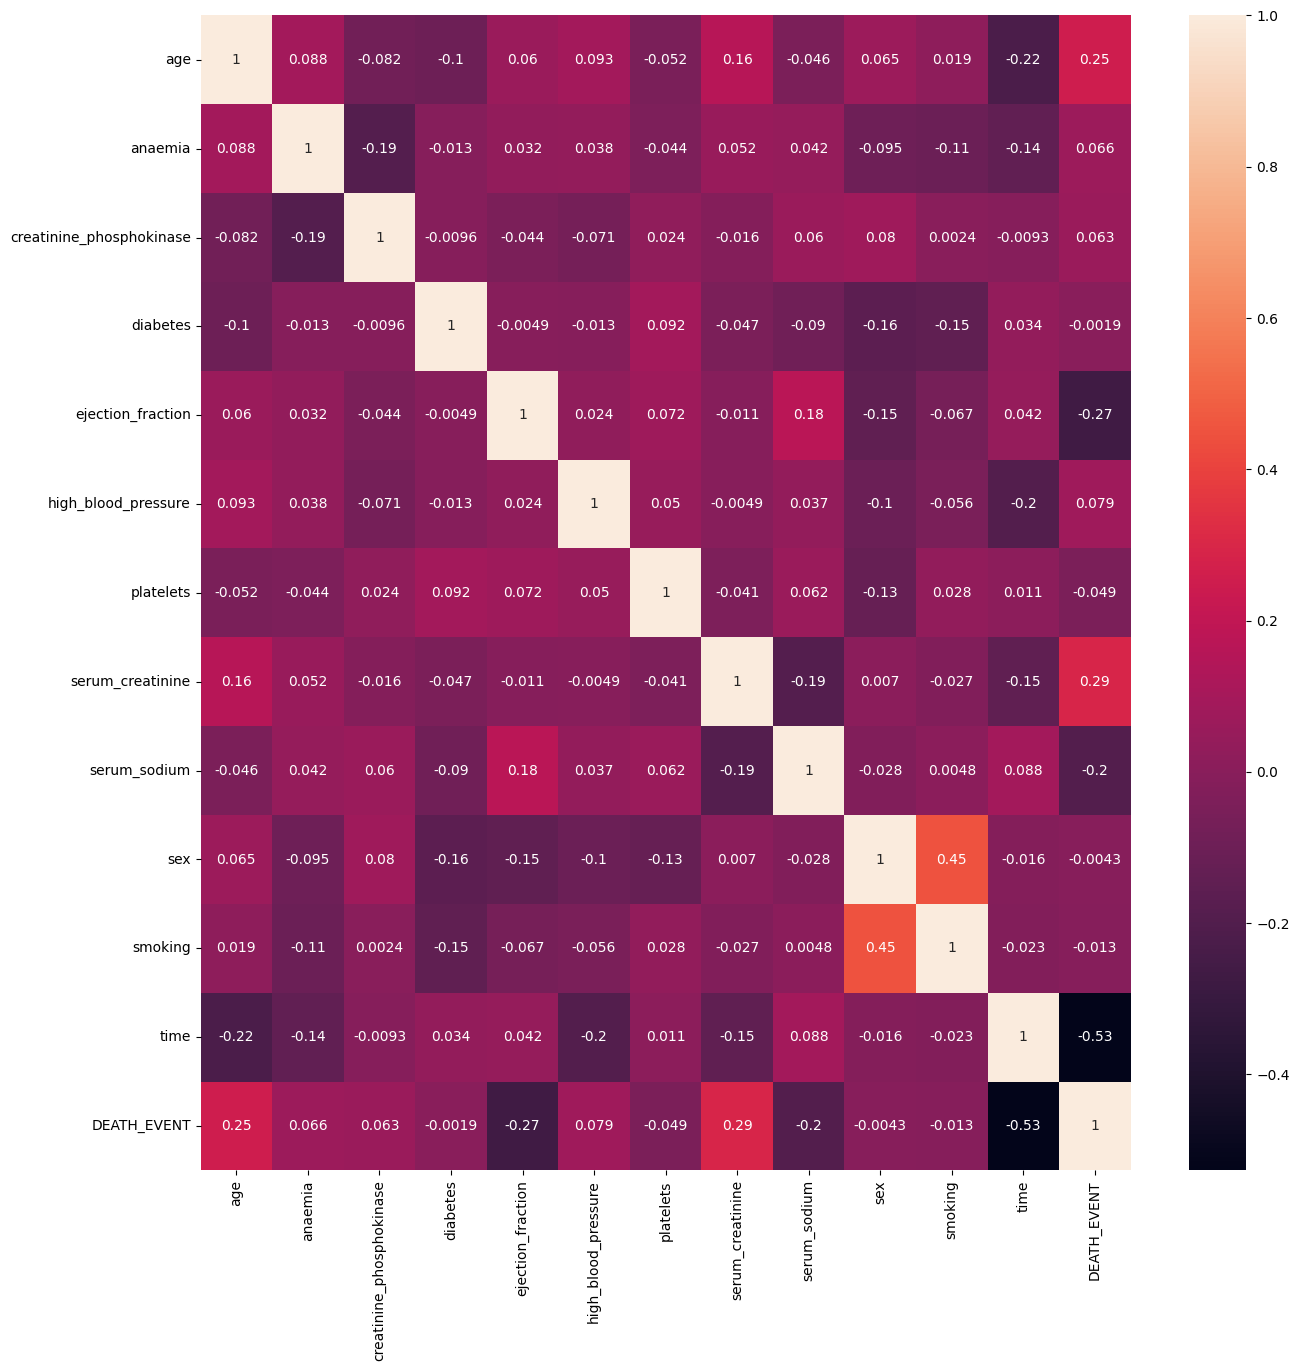

In [12]:
corr=df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

In [13]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 12)
(60, 12)
(239,)
(60,)


In [15]:
def add_interactions(df):
    features = df.columns
    m = len(features)
    X_int = df.copy(deep=True)
    for i in range(m):
        feature_i_name = features[i]
        feature_i_data = X_int[feature_i_name]
        for j in range(i+1, m):
            feature_j_name = features[j]
            feature_j_data = X_int[feature_j_name]
            feature_name = feature_i_name + "_x_" + feature_j_name
            X_int[feature_name] = feature_i_data * feature_j_data
    return X_int

X_train_int = add_interactions(X_train)
X_test_int = add_interactions(X_test)

### Modeling

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nRecall Score:", recall_score(y_test, y_pred))

In [17]:
from sklearn.linear_model import LogisticRegression

ls=LogisticRegression(max_iter=100000)
ls.fit(X_train,y_train)

ls_pred =ls.predict(X_test)

In [18]:
evaluate_model(ls)

Accuracy Score: 0.8166666666666667

Confusion Matrix:
 [[35  5]
 [ 6 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.74      0.70      0.72        20

    accuracy                           0.82        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.81      0.82      0.82        60


Recall Score: 0.7


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_pip=make_pipeline(StandardScaler(),LogisticRegression())
lr_pip.fit(X_train,y_train)

lr_pip_pred =lr_pip.predict(X_test)

In [20]:
evaluate_model(lr_pip)

Accuracy Score: 0.8333333333333334

Confusion Matrix:
 [[37  3]
 [ 7 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        40
           1       0.81      0.65      0.72        20

    accuracy                           0.83        60
   macro avg       0.83      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60


Recall Score: 0.65


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid=GridSearchCV(SVC(),grid_params,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.681 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [23]:
svc=SVC(C=1, gamma=0.0001)
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)

In [24]:
evaluate_model(svc)

Accuracy Score: 0.65

Confusion Matrix:
 [[39  1]
 [20  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.97      0.79        40
           1       0.00      0.00      0.00        20

    accuracy                           0.65        60
   macro avg       0.33      0.49      0.39        60
weighted avg       0.44      0.65      0.53        60


Recall Score: 0.0


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search (params, runs=20, model=DecisionTreeClassifier(random_state=2)):
    rand_model = RandomizedSearchCV(model, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_model.fit(X_train, y_train) 
    best_model = rand_model.best_estimator_
    best_score = rand_model.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                        'splitter':['random', 'best'],
                        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                        'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                        'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                        'max_depth':[None, 2,4,6,8],
                        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                        })

Training score: 0.845
Test score: 0.767


c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

In [26]:
ds_model=DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')      

ds_model.fit(X_train, y_train)
y_pred4 = ds_model.predict(X_test)

In [27]:
evaluate_model(ds_model)

Accuracy Score: 0.6666666666666666

Confusion Matrix:
 [[40  0]
 [20  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        40
           1       0.00      0.00      0.00        20

    accuracy                           0.67        60
   macro avg       0.33      0.50      0.40        60
weighted avg       0.44      0.67      0.53        60


Recall Score: 0.0


c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [28]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, model=RandomForestClassifier(random_state=2))

Training score: 0.854
Test score: 0.833


c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

RandomForestClassifier(max_depth=4, max_features=0.7, min_samples_leaf=4,
                       random_state=2)

In [29]:
rf_model=RandomForestClassifier(max_depth=8, max_features=0.8, min_impurity_decrease=0.01, min_samples_leaf=10, random_state=2)

rf_model.fit(X_train, y_train)
y_pred5 = rf_model.predict(X_test)

In [30]:
evaluate_model(rf_model)

Accuracy Score: 0.8166666666666667

Confusion Matrix:
 [[33  7]
 [ 4 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.70      0.80      0.74        20

    accuracy                           0.82        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.83      0.82      0.82        60


Recall Score: 0.8


In [44]:
from xgboost import XGBClassifier
xgb=XGBClassifier(
    colsample_bytree = 1.0,
    learing_rate = 0.1,
    max_depth = 4,
    n_etimators = 400,
    subsample = 1.0,
)

eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.52287
[1]	validation_0-logloss:0.45820
[2]	validation_0-logloss:0.44346
[3]	validation_0-logloss:0.41583
[4]	validation_0-logloss:0.41009
[5]	validation_0-logloss:0.40869
[6]	validation_0-logloss:0.39970
[7]	validation_0-logloss:0.40782
[8]	validation_0-logloss:0.40265
[9]	validation_0-logloss:0.39103
[10]	validation_0-logloss:0.40308
[11]	validation_0-logloss:0.39423
[12]	validation_0-logloss:0.41011
[13]	validation_0-logloss:0.40555
[14]	validation_0-logloss:0.40944
[15]	validation_0-logloss:0.41543
[16]	validation_0-logloss:0.41581
[17]	validation_0-logloss:0.40899
[18]	validation_0-logloss:0.39776
[19]	validation_0-logloss:0.40128
[20]	validation_0-logloss:0.40126
[21]	validation_0-logloss:0.40634
[22]	validation_0-logloss:0.40680
[23]	validation_0-logloss:0.40293
[24]	validation_0-logloss:0.40557
[25]	validation_0-logloss:0.41294
[26]	validation_0-logloss:0.41490
[27]	validation_0-logloss:0.41716
[28]	validation_0-logloss:0.41745
[29]	validation_0-loglos

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:08:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learing_rate", "n_etimators" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learing_rate=0.1,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_etimators=400, n_jobs=None, ...)

In [45]:
pred6=xgb.predict(X_test)

In [46]:
evaluate_model(xgb)

Accuracy Score: 0.8

Confusion Matrix:
 [[33  7]
 [ 5 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85        40
           1       0.68      0.75      0.71        20

    accuracy                           0.80        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.81      0.80      0.80        60


Recall Score: 0.75


C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learing_rate", "n_etimators" } are not used.

  warnings.warn(smsg, UserWarning)


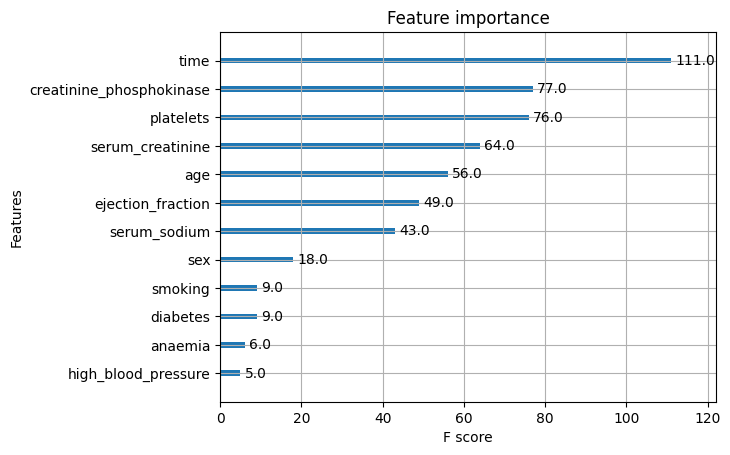

In [47]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt=GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
gbdt.fit(X_train, y_train)

pred7=gbdt.predict(X_test)

In [49]:
evaluate_model(gbdt)

Accuracy Score: 0.85

Confusion Matrix:
 [[36  4]
 [ 5 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.79      0.75      0.77        20

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60


Recall Score: 0.75


In [50]:
import joblib

joblib.dump(xgb, 'xgb_model.pkl')
model=joblib.load('xgb_model.pkl')
model.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0])